# Assignment 6

For the titanic dataset perform the hypothesis testing to claim that there is a
significant difference between  proportions of survived females to that of survived
males.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

In [2]:
data = pd.read_csv(r'C:\Users\Meet\Downloads\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Survived'] = data['Survived'].map({1:'Survived',0:'Not Survived'}) #Encode the values
data = data.dropna() #Drop the nan values
contingency_table = pd.crosstab(data.Survived,data.Sex) #Contingency Table
contingency_table

Sex,female,male
Survived,,
Not Survived,6,54
Survived,82,41


In [4]:
pd.crosstab(data.Survived,data.Sex).apply(lambda r:r/r.sum(),axis=0)

Sex,female,male
Survived,,
Not Survived,0.068182,0.568421
Survived,0.931818,0.431579


Hypothesis:

The hypothesis we test is if the above difference of proportions will be zero or not equal to zero(a two tailed test will be required). Mathematically, we represent it as:

H0: pf-pm=0 (Null hypothesis)
H1: pf-pm!=0(Alternative hypothesis)

We preset the significance level to 0.10

In [5]:
total_proportion_survived = (data.Survived == "Survived").mean()
num_female = data[data.Sex=="female"].shape[0]
num_male = data[data.Sex=="male"].shape[0]
assert num_female*total_proportion_survived>10, "Assumptions not met"
assert num_male*total_proportion_survived>10, "Assumptions not met"
assert num_female*(1-total_proportion_survived)>10, "Assumptions not met"
assert num_male*(1-total_proportion_survived)>10, "Assumptions not met"

In [6]:
#This table helps us to calculate the Standard Error.
prop = data.groupby("Sex")["Survived"].agg([lambda z: np.mean(z=="Survived"), "size"])
prop.columns = ['proportions_survived','total_counts']
prop.head()

,proportions_survived,total_counts
Sex,,
female,0.931818,88
male,0.431579,95


In [7]:
#Calculating standard error
variance = total_proportion_survived * (1 - total_proportion_survived)
standard_error = np.sqrt(variance * (1 / prop.total_counts.female + 1 / prop.total_counts.male))
print("Sample Standard Error",standard_error)

Sample Standard Error 0.06945435736849903


In [8]:
# Calculate the test statistic 
best_estimate = (prop.proportions_survived.female - prop.proportions_survived.male)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

The best estimate is 0.5002392344497607
Computed Test Statistic is 7.202416859113346


This implicates that our sample proportion difference estimate is ~7.2 standard errors above our hypothesized estimate

In [9]:
# Calculate the  p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

Computed P-value is 5.915451296155379e-13


We can clearly see that p-value is way lesser than the significance level of 0.10. So we can safely reject the null hypothesis in favour of the alternative hypothesis. We infer that the difference in proportions between that of survived females to that of survived males is significant and certainly not equal to zero(females might had had better access to lifeboats).

### For the iris dataset perform the ANOVA testing.
“Normally, species variable put as dependent variable to do classification. But species also can put as independent variable to conduct ANOVA test. Conduct the statistical test that figures out three or more differences in group means.

In [10]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
dataframe_iris=pd.DataFrame(iris.data,columns=['sepalLength','sepalWidth','petalLength','petalWidth'])

In [12]:
dataframe_iris1=pd.DataFrame(iris.target,columns=['target'])

In [13]:
ID=[]
for i in range(0,150):
    ID.append(i)

In [14]:
dataframe=pd.DataFrame(ID,columns=['ID'])
dataframe_iris_new=pd.concat([dataframe_iris,dataframe_iris1,dataframe],axis=1)
dataframe_iris_new.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'target',
       'ID'],
      dtype='object')

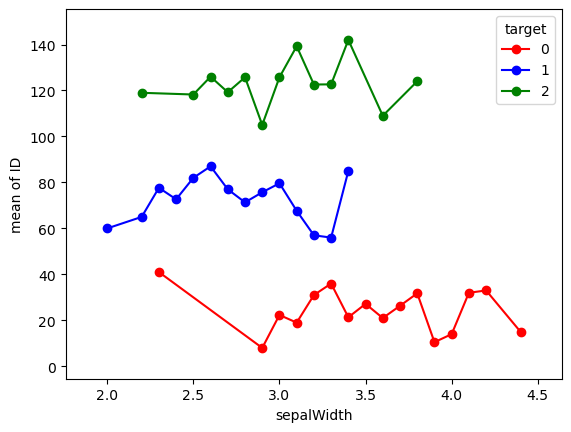

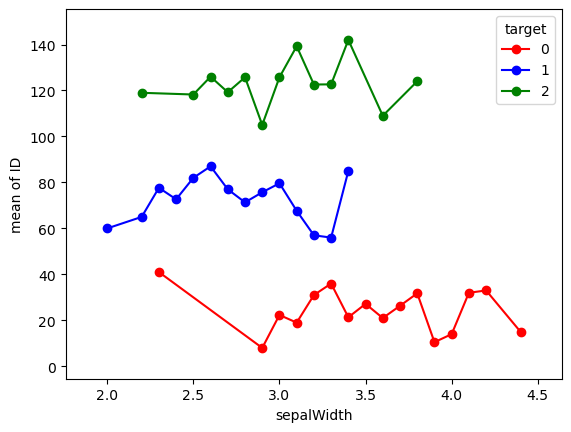

In [15]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(dataframe_iris_new.sepalWidth,dataframe_iris_new.target,
                       dataframe_iris_new.ID,colors=['red','blue','green'], ms=12)
fig

Anova hypothesis

To implement Anova test we have to create null hypothesis and alternate hypothesis

Null hypothesis=sample means are equal

Alternate hypothesis=sample means are not equal

In [16]:
dataframe_iris_new.mean()

sepalLength     5.843333
sepalWidth      3.057333
petalLength     3.758000
petalWidth      1.199333
target          1.000000
ID             74.500000
dtype: float64

Before performing anova test Anova assumes following points. Anova assumptions: 1.Normality:-samples are taken from normal distribution. To check whether data is normally distributed or not Anova use shapiro-wilks test 2.Each sample is independent of other sample. 3.Variance:- variance should be same. To check whether variance between groups are equal Anova use levene/barlett test.

In [17]:
from scipy.stats import shapiro
from scipy import stats
stats.shapiro(dataframe_iris_new['sepalWidth'][dataframe_iris_new['target']])

ShapiroResult(statistic=0.7824642658233643, pvalue=1.1905897817111877e-13)

Interpretation:-As p-value is significant we reject null hypothesis.

Check equality of variance between groups(levene/bartlett test)

In [18]:
p_value=stats.levene(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])
p_value

LeveneResult(statistic=55.1738582824089, pvalue=1.1695737027924642e-12)

Interpretation:- As p-value is significant we reject null hypothesis

One way Anova

Null hypothesis(h0):-null hypothesis is that all groups of mean are equal,there is no difference between them. Alternate hypothesis(h1):-alternate hypothesis states that there is difference between mean

In [19]:
F_value,P_value=stats.f_oneway(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])

In [20]:
print("F_value=",F_value,",","P_value=",P_value)

F_value= 737.2872570149498 , P_value= 1.418242288711535e-82


In [21]:
if F_value>1.0:
    print("******SAMPLES HAVE DIFFERENT MEAN******")
else:
    print("******SAMPLES HAVE EQUAL MEAN******")

******SAMPLES HAVE DIFFERENT MEAN******


In [22]:
if P_value<0.05:
    print("******REJECT NULL HYPOTHESIS******")
else:
    print("******ACCEPT NULL HYPOTHESIS******")

******REJECT NULL HYPOTHESIS******


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
tukey = pairwise_tukeyhsd(endog=dataframe_iris_new['sepalWidth'], groups=dataframe_iris_new['target'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658    0.0 -0.8189 -0.4971   True
     0      2   -0.454    0.0 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------
